In [75]:
import cv2 
from matplotlib import pyplot as plt 
from ultralytics import YOLO
import numpy as np
from matplotlib import pyplot as plt
import math
import easyocr
cv2.__version__[0]

'4'

In [76]:
model = YOLO('C:/Users/Harini/Documents/college/MTech_Thesis-Project/django_tailwind/src/model/bestTrain13.pt')

rf='mr'
reader = easyocr.Reader(['en',rf])

In [77]:
def display(im_path):
    dpi = 30
    im_data = plt.imread(im_path)
    # height, width, depth = im_data.shape

    figsize = im_data.shape[1] / float(dpi), im_data.shape[0] / float(dpi)

    fig = plt.figure(figsize = figsize)
    ax = fig.add_axes([0,0,1,1])

    ax.axis('off')

    ax.imshow(im_data, cmap='gray')

    plt.show()
def disp(name,img):
    cv2.imwrite(name,img)
    display(name)
def showImg(image, conversion=cv2.COLOR_BGR2RGB, title=None):

    # Converts from one colour space to the other. this is needed as RGB
    # is not the default colour space for OpenCV
    image1 = image.copy() 
    if conversion is not None:
        image1 = cv2.cvtColor(image, conversion)

    # Show the image
    plt.imshow(image1)

    # remove the axis / ticks for a clean looking image
    plt.xticks([])
    plt.yticks([])

    # if a title is provided, show it
    if title is not None:
        plt.title(title)
        cv2.imwrite(title+'.png',image)

    plt.show()

In [78]:
def testEasyOCR(path_name):
    number = []
    translatedNumber = []
    translations = {
        'महाराष्ट्र':'MH',
        'महा':'MH',
        '०':'0',
        '१':'1',
        '२':'2',
        '३':'3',
        '४':'4',
        '५':'5',
        '६':'6',
        '७':'7',
        '८':'8',
        '९':'9',
        'बि':'B',
        'बी':'B',
        'सी':'C',
        'च':'C',
        'डी':'D',
        'इ':'E', 
        'जी':'G',
        'एच':'H',
        'ह':'H',
        'हा':'H',
        'के':'K',
        'म':'M', 
        'एम':'M', 
        'एन':'N',
        'न':'N',
        'पी':'P', 
        'क्यु':'Q',
        'आर':'R',
        'यु':'U',
        'ए्क्स':'X',
        'एक्स':'X',
    }
    if rf=='en':
        output = reader.readtext(path_name, allowlist='ABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890',contrast_ths=0.3, batch_size=3)
    else:
        # output = reader.readtext(path_name,allowlist='६ २ ९ म हा रा ष्ट्र १ ए म बी', contrast_ths=0.3, batch_size=3)
        output = reader.readtext(path_name, contrast_ths=0.3, batch_size=3)
    

    for out in output:
        text_bbox, text, text_score = out
        print(text,text_score)
        if text_score > 0.2:
            number.append(text)
        # df.loc[len(df.index)] = [path_name,text,text_score]  
    '''
    
        ['६२९९', 'महाराष्ट्र १२', 'एम बी']
        ['6299', 'MH', '12', 'M', 'B']
    '''
    if not rf=='en':
        for i in number:
            tr1=[]
            if i.count(' ')>0:
                for j in i.split(' '):
                    if j in translations:
                        tr1.append(translations.get(j,''))
                    else:
                        tr = []
                        for k in j:
                            tr.append(translations.get(k,''))
                        tr1.append(''.join(tr))
            else:
                for j in i:
                    if j in translations:
                        tr1.append(translations.get(j,''))
                    else:
                        tr = []
                        for k in j:
                            tr.append(translations.get(k,''))
                        tr1.append(''.join(tr))
            translatedNumber.append(''.join(tr1))
            # if 
    print(number)
    print(translatedNumber)

In [79]:

def detect_rec(img, show_figures=False):
    H, W, _ = img.shape
    results = model.predict(img, conf=0.5)
    # bboxes, class_ids, confidences
    bbox = None
    number = []
    # print('Detections are ',results)

    bbox = results[0].boxes.xyxy.tolist()
    # print('BBOX ISSSS',bbox)
    if len(bbox) == 0:
        return None
    xs, ys, xe, ye = bbox[0]
    xs, ys, xe, ye = round(xs), round(ys), round(xe), round(ye)
    bbox = (xs, ys, xe, ye)
    if False:
        img = cv2.rectangle(img,
                            (xs, ys),
                            (xe, ye),
                            (0, 255, 0),
                            4)
    # plt.figure()
    # plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    padding = 100
    showImg(img[ys:ye, xs:xe].copy(),title='ActualDetection')
    license_plate = img[ys-padding:ye+padding, xs-padding:xe+padding].copy()
    return license_plate

# Image Input


0: 640x480 1 License, 14.4ms
Speed: 6.4ms preprocess, 14.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 480)


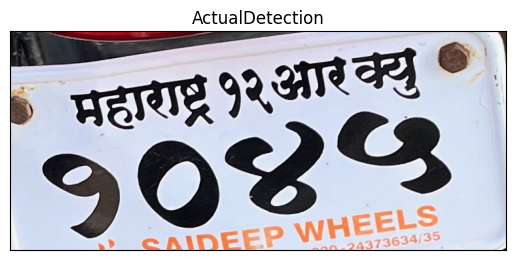

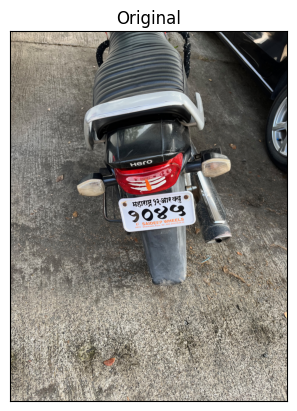

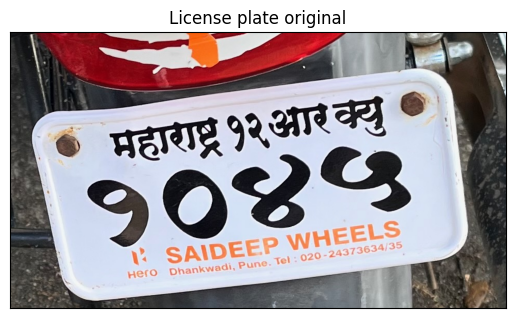

In [80]:
fullImage = cv2.imread("D:/MTech_Thesis/datasets/ANPR_IMAGES_self_select/IMG_2249.jpeg")
img = detect_rec(fullImage)
# preprocess(img)
showImg(fullImage,title='Original')
if img is None:
    print('No Plate detected')
    raise Exception
showImg(img,title='License plate original')

# PRAGATI UNNA

In [81]:
def noise_removal(image):
    kernel1 = np.ones((1,1), np.uint8)
    image = cv2.dilate(image, kernel1, iterations=1)
    kernel2 = np.ones((1,1), np.uint8)
    image = cv2.erode(image, kernel2, iterations=3)
    image = cv2.morphologyEx(image,cv2.MORPH_CLOSE, kernel2)
    image = cv2.medianBlur(image,3)
    return (image)

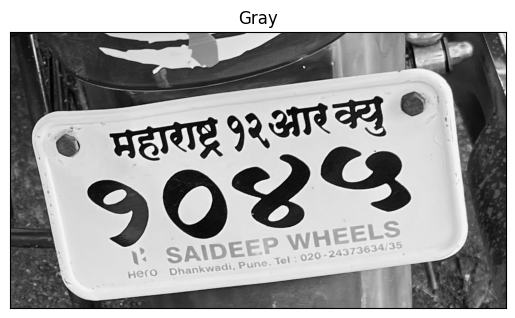

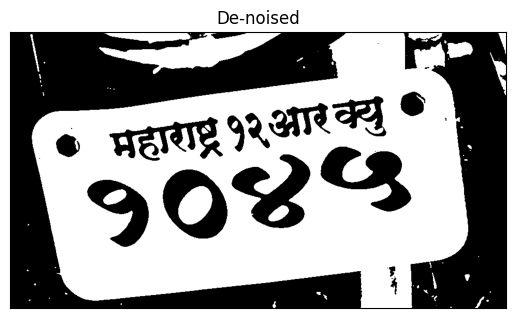

1


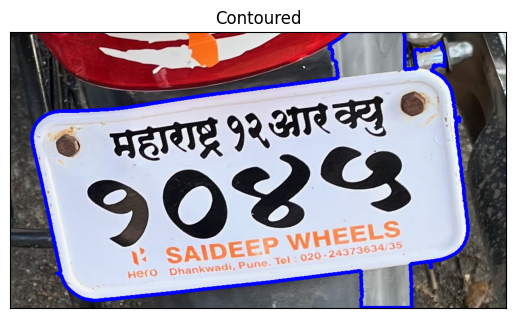

approx [[[831  21]]

 [[ 63 165]]

 [[ 90 467]]

 [[775 533]]]


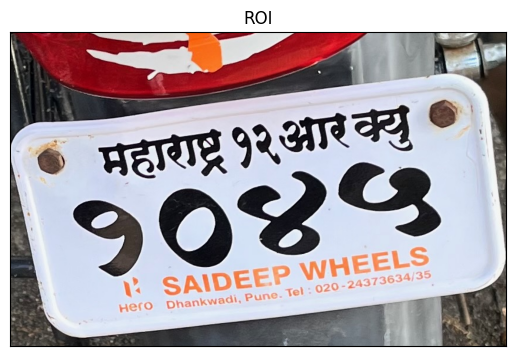

NumberPlateCnt [[[831  21]]

 [[ 63 165]]

 [[ 90 467]]

 [[775 533]]]


In [89]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
showImg(gray,title='Gray')
# blur = cv2.GaussianBlur(gray,(27,27),0)
thresh = cv2.threshold(gray,122,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
denoised = noise_removal(thresh)
showImg(denoised,title='De-noised')
cnts = cv2.findContours(denoised, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:1] #sort contours based on their area keeping minimum required area as '30' (anything smaller than this will not be considered)
NumberPlateCnt = None #we currently have no Number plate contour
print(len(cnts))
contouredImg = img.copy()
cv2.drawContours(contouredImg, cnts, -1, (255,0,0),5)
showImg(contouredImg,title='Contoured')
# loop over our contours to find the best possible approximate contour of number plate
count = 0
for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.05 * peri, True)
        print('approx',approx)
        if len(approx) == 4:  # Select the contour with 4 corners
            NumberPlateCnt = approx #This is our approx Number Plate Contour
            x,y,w,h = cv2.boundingRect(c)
            ROI = img[y:y+h, x:x+w].copy()
            showImg(ROI,title='ROI')
            break

if NumberPlateCnt is not None:
      print('NumberPlateCnt',NumberPlateCnt)
    # Drawing the selected contour on the original image
# plt.imshow(img)
# plt.show()

More Preprocessing

In [83]:
def dist(x1, x2, y1, y2):
    return ((x1-x2)**2+(y1-y2)**2)**0.5
idx=0
m=0
# To find the index of coordinate with maximum y-coordinate
for i in range(4):
    if NumberPlateCnt[i][0][1]>m:
        idx=i
        m=NumberPlateCnt[i][0][1]

# Assign index to the previous coordinate
if idx==0:
    pin=3
else:
    pin=idx-1

# Assign index to the next coordinate
if idx==3:
    nin=0
else:
    nin=idx+1

# Find distances between the acquired coordinate and its previous and next coordinate
p=dist(NumberPlateCnt[idx][0][0], NumberPlateCnt[pin][0][0], NumberPlateCnt[idx][0][1], NumberPlateCnt[pin][0][1])
n=dist(NumberPlateCnt[idx][0][0], NumberPlateCnt[nin][0][0], NumberPlateCnt[idx][0][1], NumberPlateCnt[nin][0][1])

# The coordinate that has more distance from the acquired coordinate is the required second bottom-most coordinate
if p>n:
    if NumberPlateCnt[pin][0][0]<NumberPlateCnt[idx][0][0]:
        left=pin
        right=idx
    else:
        left=idx
        right=pin
    d=p
else:
    if NumberPlateCnt[nin][0][0]<NumberPlateCnt[idx][0][0]:
        left=nin
        right=idx
    else:
        left=idx
        right=nin
    d=n
print(left, right)

2 3


90 467 775 533
5.5034828657684045


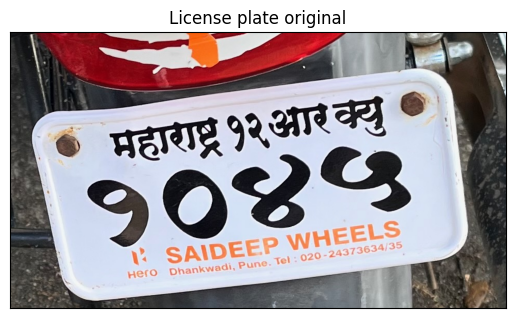

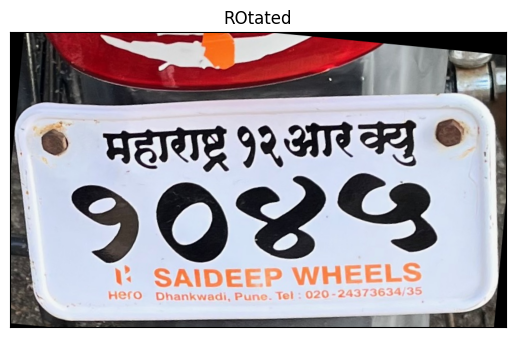

महाराष्ट्र १२ आर क्यु 0.44810352057103503
१०४५ 0.9933798909187317
SAIDEEP WHEELS 0.8602117650310359
020 -24373634/35 0.7586673663740912
Hero 0.6071672931204564
Dnankwadi Pune Tel 0.5489425947427892
['महाराष्ट्र १२ आर क्यु', '१०४५', 'SAIDEEP WHEELS', '020 -24373634/35', 'Hero', 'Dnankwadi Pune Tel']
['MH12RQ', '1045', '', '', '', '']


In [84]:
left_x=NumberPlateCnt[left][0][0]
left_y=NumberPlateCnt[left][0][1]
right_x=NumberPlateCnt[right][0][0]
right_y=NumberPlateCnt[right][0][1]
print(left_x, left_y, right_x, right_y)

opp=right_y-left_y
hyp=((left_x-right_x)**2+(left_y-right_y)**2)**0.5
sin=opp/hyp
theta=math.asin(sin)*57.2958
# theta=math.asin(sin)*75
print(theta)
theta = -theta
# Rotate the image according to the angle of rotation obtained
image_center = tuple(np.array(ROI.shape[1::-1]) / 2)
rot_mat = cv2.getRotationMatrix2D(image_center, theta, 1.0)
result = cv2.warpAffine(ROI, rot_mat, ROI.shape[1::-1], flags=cv2.INTER_LINEAR)

# The image can be cropped after rotation( since rotated image takes much more height)
if opp>0:
    h=result.shape[0]-opp//2
else:
    h=result.shape[0]+opp//2

result=result[0:h, :]
showImg(img,title='License plate original')
showImg(result,title='ROtated')
testEasyOCR(cv2.cvtColor(result,cv2.COLOR_BGR2GRAY))